### Ускорение
$$ S = \frac{T_{\text{serial}}}{T_{\text{parallel}}}$$


### Эффективность
$$ E = \frac{S}{p}  = \frac{T_\text{serial}}{p T_\text{parallel}}$$

## Аппроксимация ускорения и эффективности
* Для каждого числа потоков $p$ будем вычислять $T_{parallel}$ как среднее десяти (в случае rw_lock -- одного) запусков для одних и тех же входных данных.
* Временем работы программы $T_\text{serial}$ без распараллеливания будем считать как время работы программы, запущенной с параметром $\text{nthreads} = 1$.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
data = pd.read_csv('csv/pi_time.csv')
df = pd.DataFrame(data)
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [81]:
lst = df[df['threads'] == 1]['time']

lst = pd.concat([lst] * 8, axis = 0, ignore_index=True)

0      0.000203
1      0.000239
2      0.000241
3      0.000340
4      0.001920
        ...    
67     0.001920
68     0.017364
69     0.165317
70     1.706292
71    16.575730
Name: time, Length: 72, dtype: float64

In [83]:
df['acceleration'] = lst / df['time']
df['efficiency'] = lst / (df['time'] * df['threads'])
df

,threads,points,runs,time,acceleration,efficiency
0,1.0,1.000000e+01,10.0,0.000203,1.0,1.0
1,1.0,1.000000e+02,10.0,0.000239,1.0,1.0
2,1.0,1.000000e+03,10.0,0.000241,1.0,1.0
3,1.0,1.000000e+04,10.0,0.000340,1.0,1.0
4,1.0,1.000000e+05,10.0,0.001920,1.0,1.0
...,...,...,...,...,...,...
67,32.0,1.000000e+05,10.0,0.002588,NaN,NaN
68,32.0,1.000000e+06,10.0,0.003785,NaN,NaN
69,32.0,1.000000e+07,10.0,0.021931,NaN,NaN
70,32.0,1.000000e+08,10.0,0.225579,NaN,NaN


In [49]:
df

,threads,points,runs,time,acceleration,efficiency
0,1.0,1.000000e+01,10.0,0.000203,1.0,1.0
1,1.0,1.000000e+02,10.0,0.000239,1.0,1.0
2,1.0,1.000000e+03,10.0,0.000241,1.0,1.0
3,1.0,1.000000e+04,10.0,0.000340,1.0,1.0
4,1.0,1.000000e+05,10.0,0.001920,1.0,1.0
...,...,...,...,...,...,...
67,32.0,1.000000e+05,10.0,0.002588,NaN,NaN
68,32.0,1.000000e+06,10.0,0.003785,NaN,NaN
69,32.0,1.000000e+07,10.0,0.021931,NaN,NaN
70,32.0,1.000000e+08,10.0,0.225579,NaN,NaN


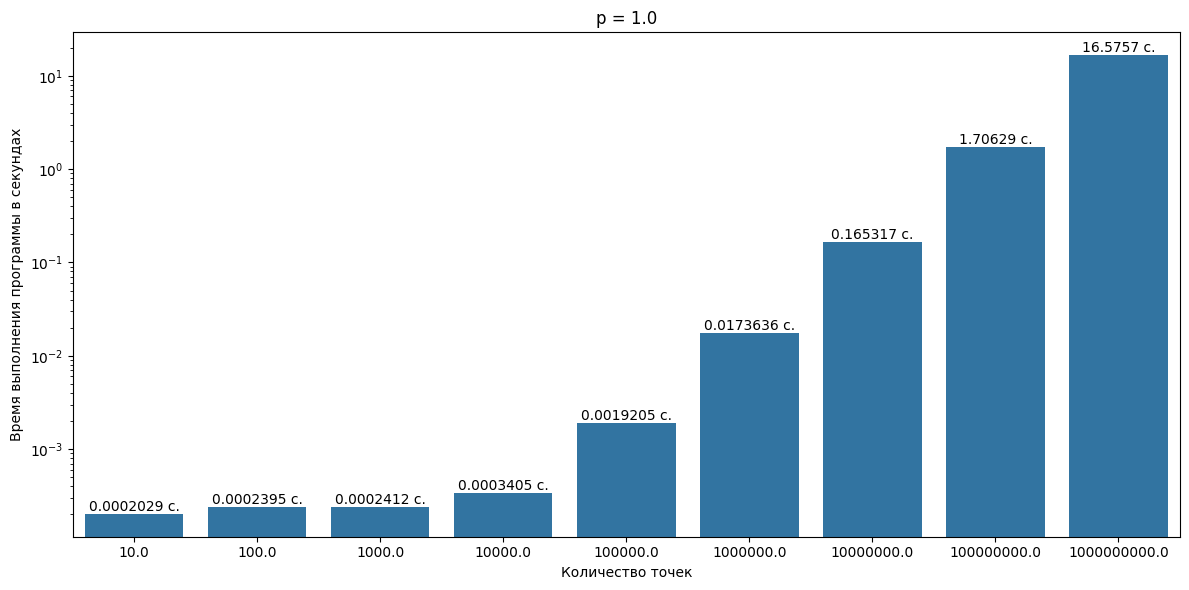

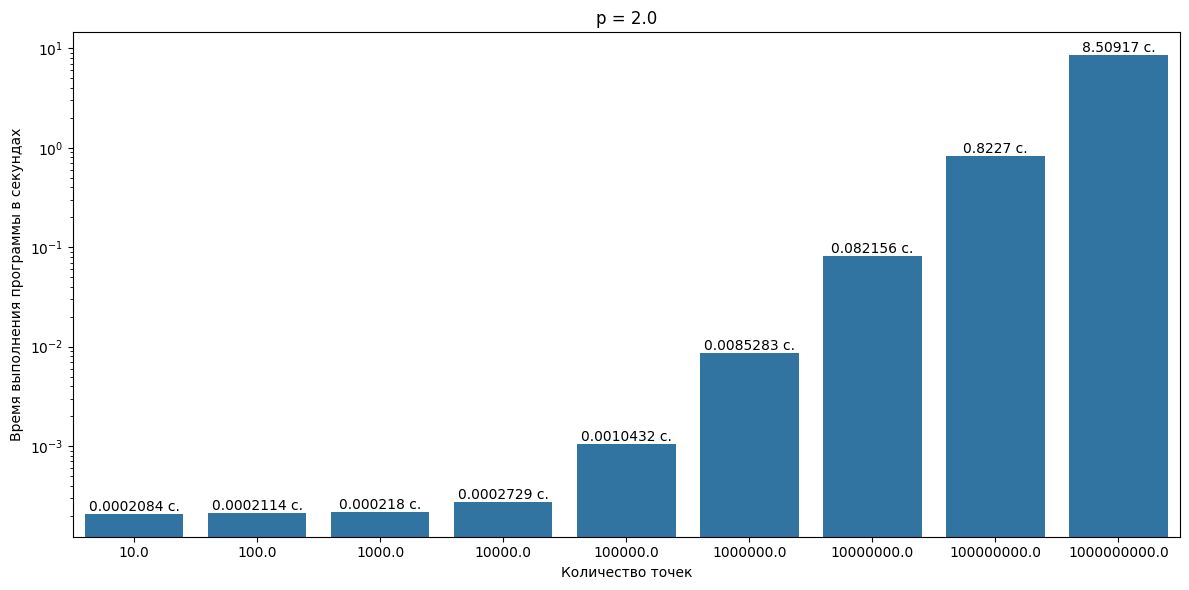

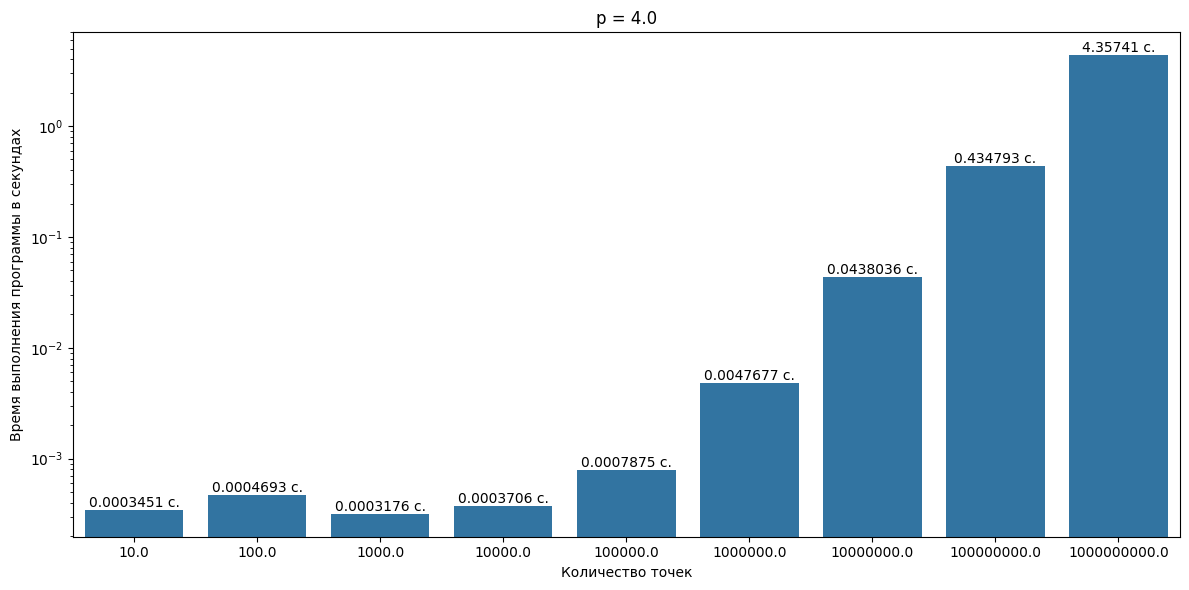

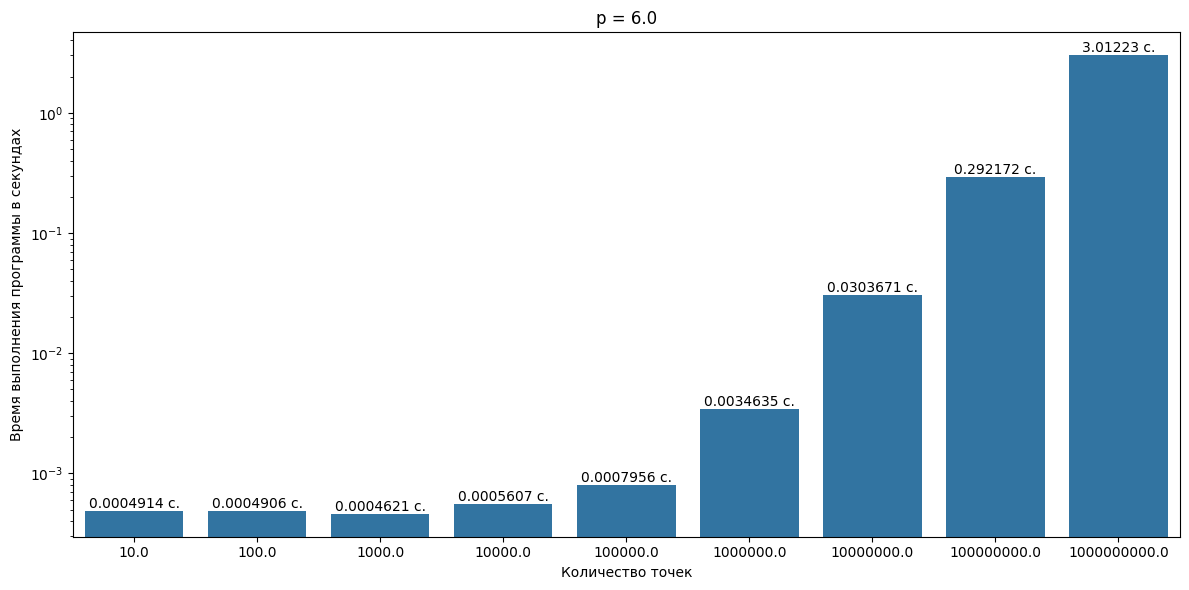

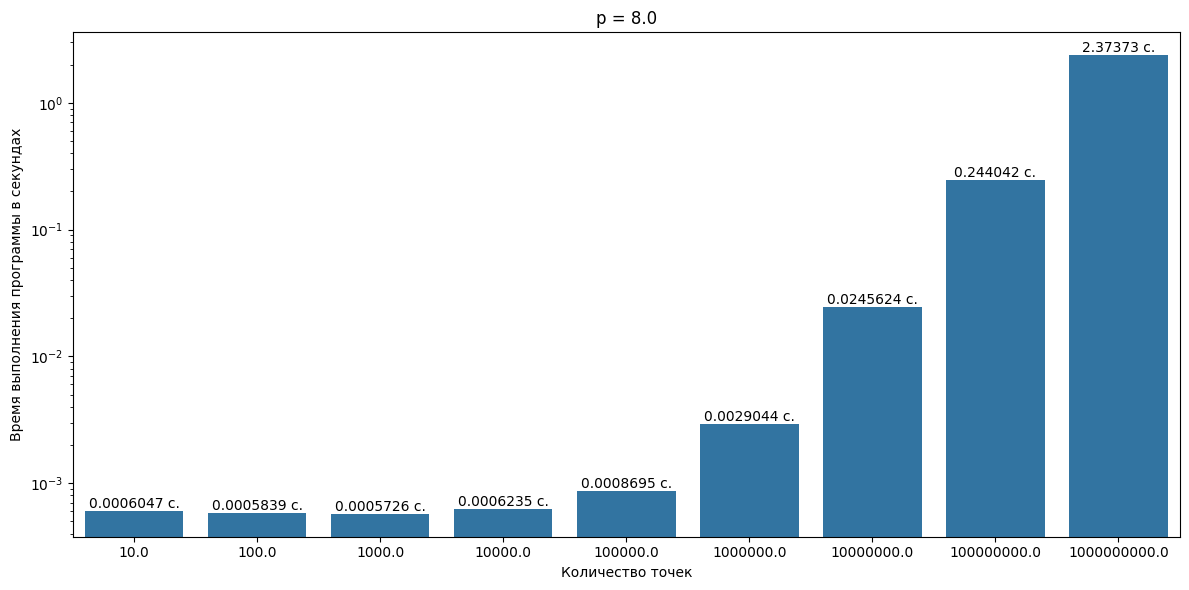

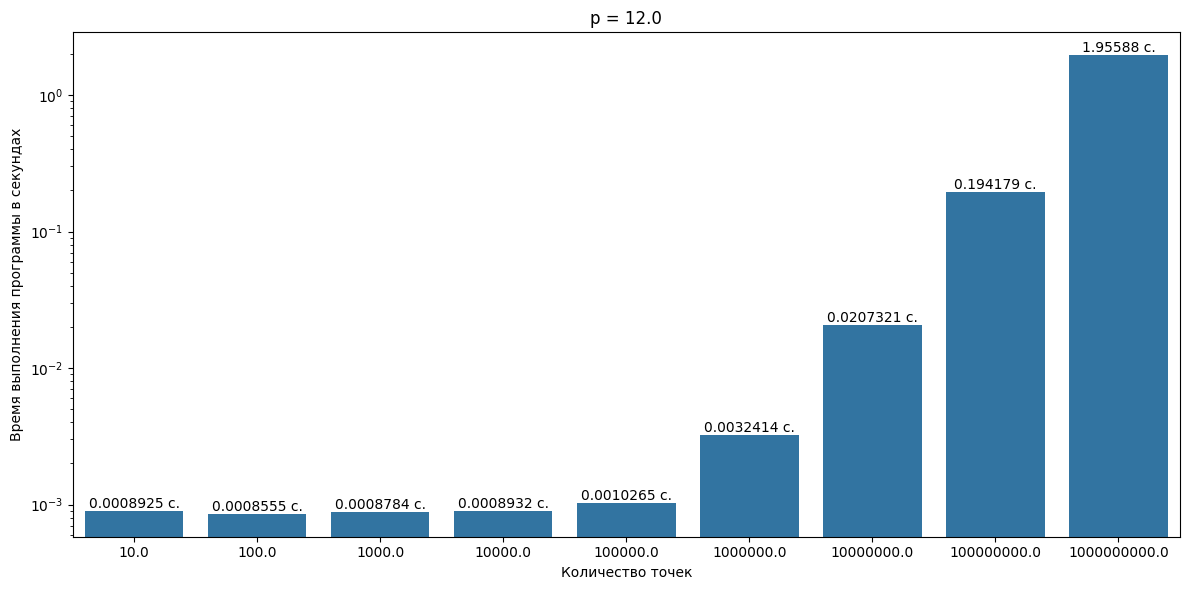

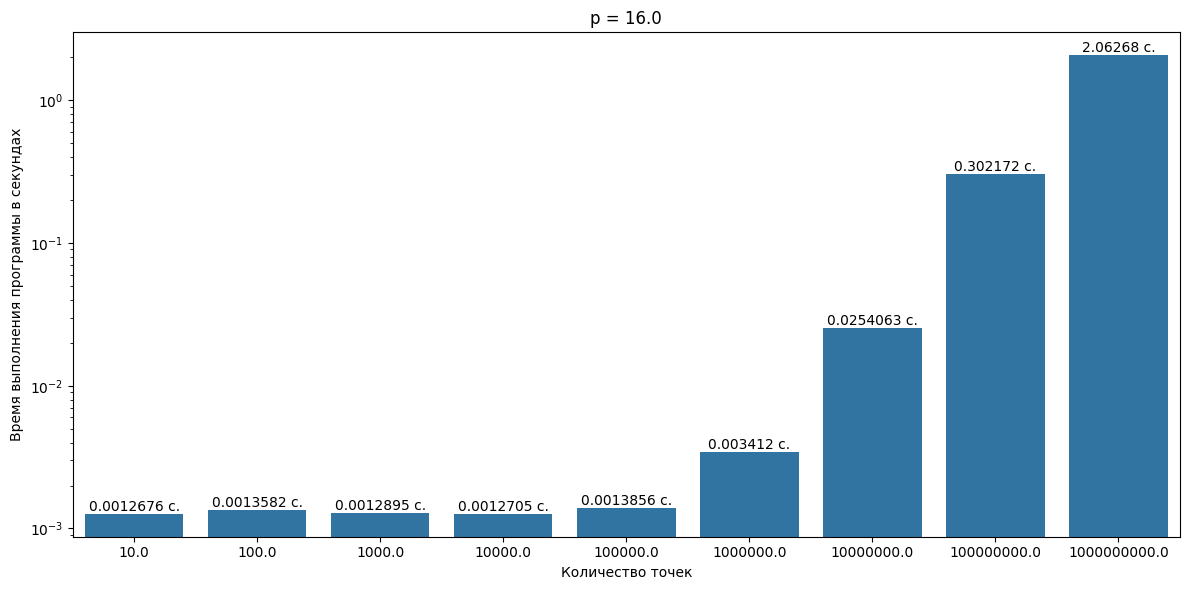

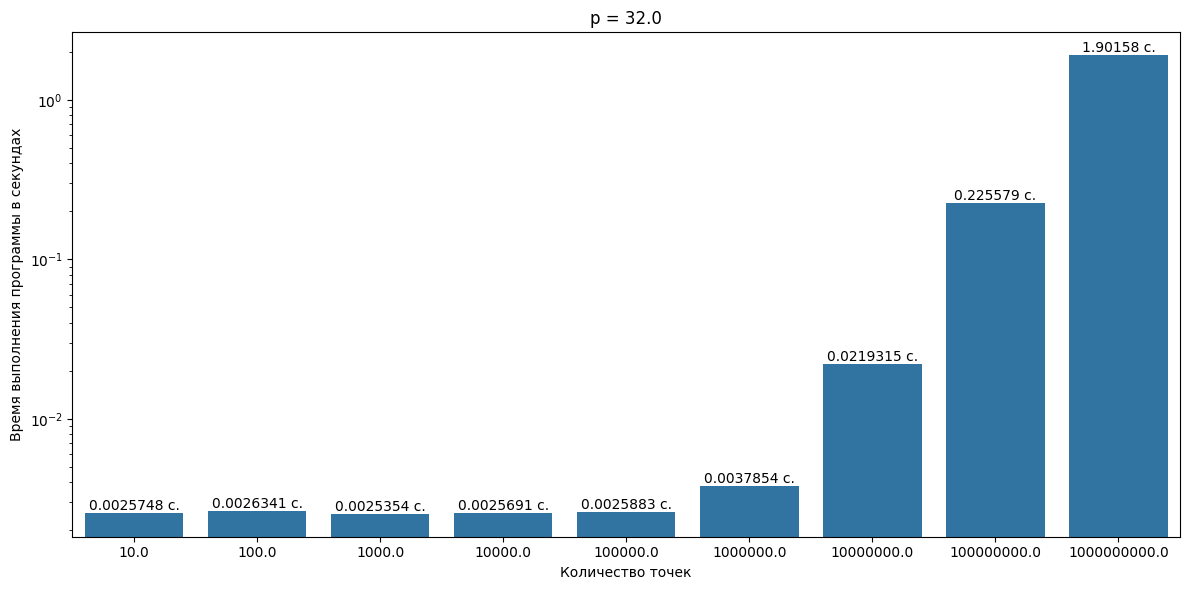

In [47]:
def make_barplot_avgtime(df: pd.DataFrame, nthreads: int, xlab: str, ylab: str):    
    plt.figure(figsize=(12, 6))

    df = df.copy()

    br = sns.barplot(x='points', y='time', data=df[df['threads'] == nthreads])
    br.bar_label(br.containers[0], fmt='%g с.')

    plt.yscale('log')
    plt.title(f'p = {nthreads}')
    plt.ylabel(f'{ylab}')
    plt.xlabel(f'{xlab}')

    plt.tight_layout()
    plt.show()

for p in df['threads'].unique():
    make_barplot_avgtime(df, p, 'Количество точек', 'Время выполнения программы в секундах')


In [11]:
help(df.iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |
 |  .. deprecated:: 2.2.0
 |
 |     Returning a tuple from a callable is deprecated.
 |
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |
 |  Allowed inputs are:
 |
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above).
 |    This is useful in method chains, when you don't have a reference to the
 |    calling object, but would like to base your selection on
 |    some value.
 |  - A tuple of row and column indexes. The tuple elements consist of one of the
 |    above inputs, 

In [4]:
# Создаем таблицу с данными для трех программ (pi, mandelbrot, pth_ll_rwl)
data = pd.read_csv('csv/')
# Преобразуем в DataFrame
df = pd.DataFrame(data)

# Вычисляем ускорение S и эффективность E
df['S'] = df['T_serial'] / df['T_parallel']
df['E'] = df['S'] / df['p']

# Выводим таблицу
print(df)

# Построим графики для сравнения
plt.figure(figsize=(12, 6))

# График для ускорения S
plt.subplot(1, 2, 1)
sns.barplot(x='program', y='S', data=df)
plt.title('Ускорение параллельных программ')
plt.ylabel('Ускорение S')

plt.subplot(1, 2, 2)
sns.barplot(x='program', y='E', data=df)
plt.title('Эффективность параллельных программ')
plt.ylabel('Эффективность E')

plt.tight_layout()
plt.show()

IsADirectoryError: [Errno 21] Is a directory: 'csv/'